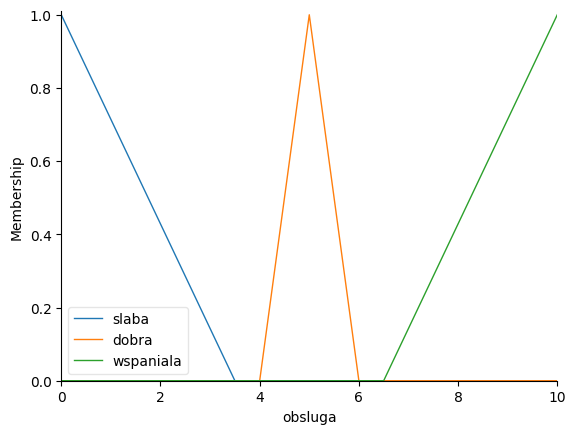

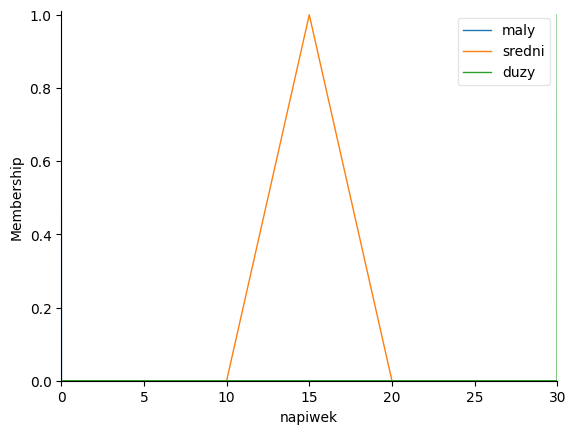

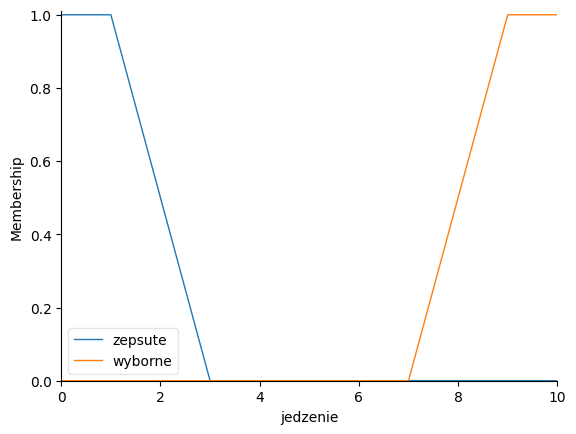

In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

obsluga = ctrl.Antecedent(np.arange(0,10.01,0.01), 'obsluga')
napiwek = ctrl.Consequent(np.arange(0,30.01,0.01), 'napiwek')
jedzenie = ctrl.Antecedent(np.arange(0,10.01,0.01), 'jedzenie')


#zmiana zbiorów wejściowych tak zaby nie nachodziły na siebie 
# obsluga['slaba'] = fuzz.trimf(obsluga.universe, [0, 10*1/6.0, 10*1.0/3.0])
# obsluga['dobra'] = fuzz.trimf(obsluga.universe, [10* 1.0/3.0 , 5 , 10*2/3.0])
# obsluga['wspaniala'] = fuzz.trimf(obsluga.universe, [10*2/3.0 , 10*5/6.0 , 10])

obsluga['slaba'] = fuzz.trimf(obsluga.universe, [0,0,3.5])
obsluga['dobra'] = fuzz.trimf(obsluga.universe, [4,5,6])
obsluga['wspaniala'] = fuzz.trimf(obsluga.universe, [6.5,10,10])


#sprawienie aby nie wartości były z zakresu 0-30
napiwek['maly'] = fuzz.trimf(napiwek.universe, [0, 0, 0])
napiwek['sredni'] = fuzz.trimf(napiwek.universe, [10, 15, 20])
napiwek['duzy'] = fuzz.trimf(napiwek.universe, [30, 30,30])

jedzenie['zepsute'] = fuzz.trapmf(jedzenie.universe,  [-2, 0, 1, 3])
jedzenie['wyborne'] = fuzz.trapmf(jedzenie.universe, [7, 9, 10, 12])


regula1 = ctrl.Rule(obsluga['slaba'], napiwek['maly'])
regula2 = ctrl.Rule(obsluga['dobra'], napiwek['sredni'])
regula3 = ctrl.Rule(obsluga['wspaniala'], napiwek['duzy'])
regula4 = ctrl.Rule(jedzenie['zepsute'], napiwek['maly'])
regula5 = ctrl.Rule(jedzenie['wyborne'], napiwek['duzy'])


obsluga.view()
napiwek.view()
jedzenie.view()


napiwek_ctr = ctrl.ControlSystem([regula1,regula2,regula3,regula4,regula5])
napiwek_sym = ctrl.ControlSystemSimulation(napiwek_ctr)

Wynik 0.0033333333333333335


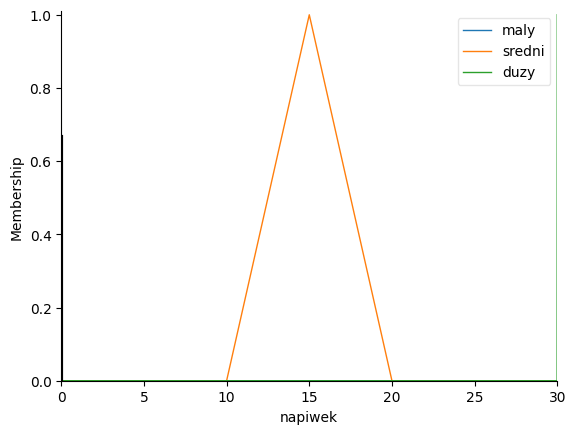

In [34]:
napiwek_sym.input['obsluga'] = 0
napiwek_sym.input['jedzenie'] = 0
napiwek_sym.compute()
print('Wynik',napiwek_sym.output['napiwek'])
napiwek.view(sim=napiwek_sym)

Wynik 29.996666666666666


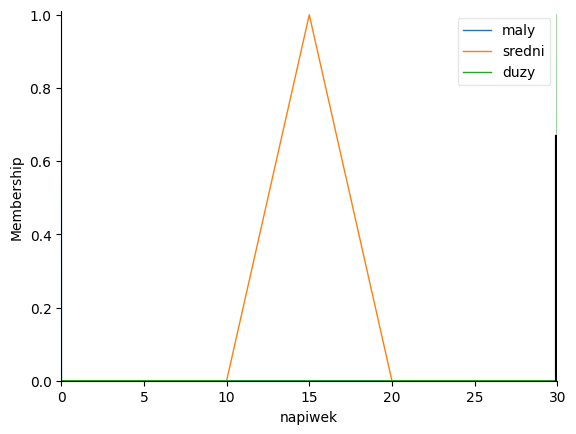

In [35]:
napiwek_sym.input['obsluga'] = 10
napiwek_sym.input['jedzenie'] = 10
napiwek_sym.compute()
print('Wynik',napiwek_sym.output['napiwek'])
napiwek.view(sim=napiwek_sym)